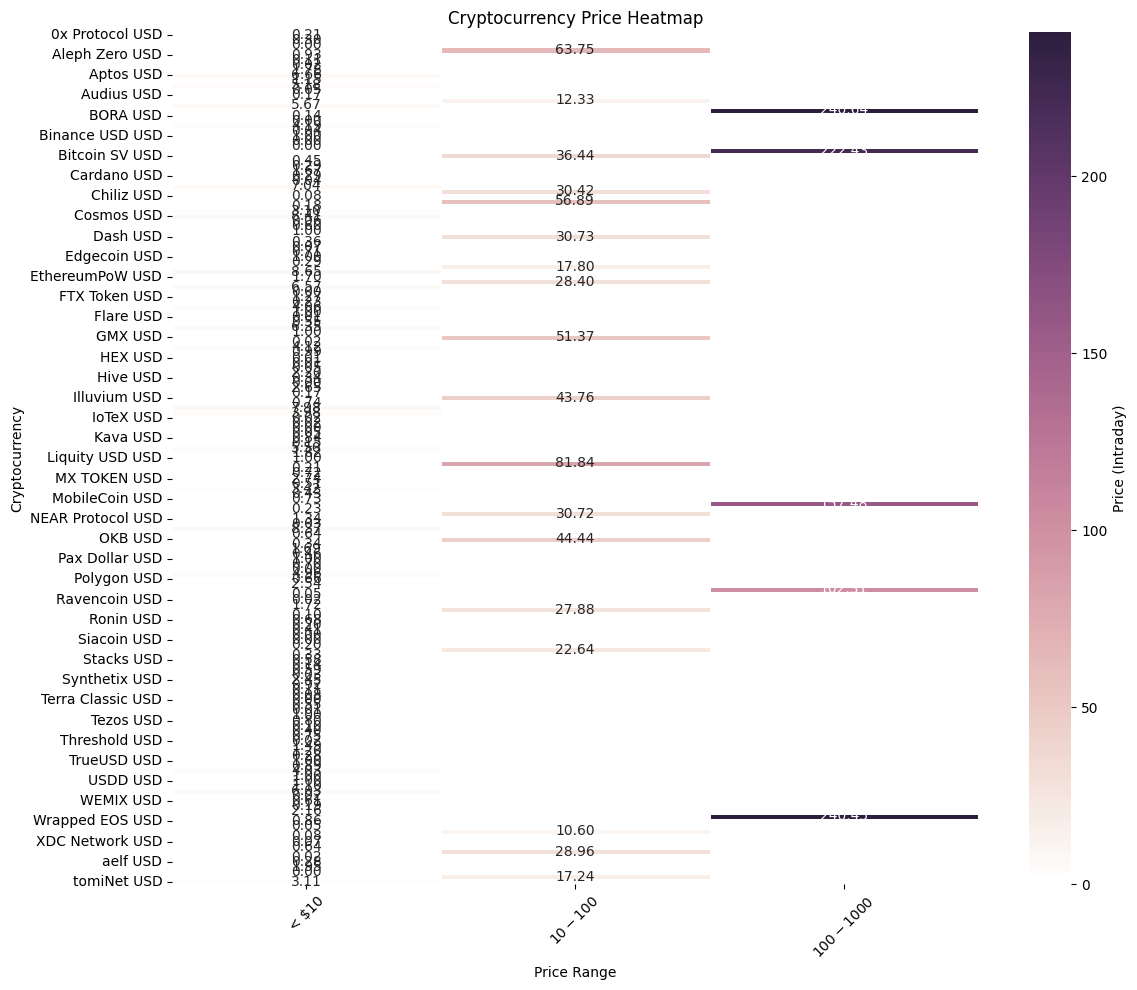

In [10]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

coin_names=[]
price=[]
Change=[]
Market_Cap=[]
Volume_in_currency=[]
Circulating_supply=[]

for i in range (0,2): 
    driver= webdriver.Chrome()
    timeout=100
    driver.set_page_load_timeout(timeout)

    j=i*100
    # url=f"https://finance.yahoo.com/crypto?offset={j}&count=25"
    url=f"https://finance.yahoo.com/crypto?count=100&offset={j}"
    # r= requests.get(url)
    driver.get(url)

    html_content=driver.page_source
    # print(r)
    soup=BeautifulSoup(html_content, 'html.parser')
    soup.prettify()

    parent_table=soup.find('table')
    rows=parent_table.find_all('tr', class_='simpTblRow')
    coin_names.extend([c.find('td', class_='Va(m) Ta(start) Px(10px) Fz(s)').text.strip() for c in rows])
    for i in rows:
        temp=i.find('td', attrs= {'class':'Va(m) Ta(end) Pstart(20px) Fw(600) Fz(s)', 'aria-label':'Price (Intraday)'})
        p=temp.find('fin-streamer')
        price.extend(p)
    for i in rows:
        temp=i.find('td', attrs= {'class':'Va(m) Ta(end) Pstart(20px) Fw(600) Fz(s)', 'aria-label':'Change'})
        p=temp.find('fin-streamer').find('span')
        Change.extend(p)
    for i in rows:
        temp=i.find('td', attrs= {'class':'Va(m) Ta(end) Pstart(20px) Fz(s)', 'aria-label':'Market Cap'})
        p=temp.find('fin-streamer')
        Market_Cap.extend(p)
    Volume_in_currency.extend([c.find('td', class_='Va(m) Ta(end) Pstart(20px) Pend(10px) W(120px) Fz(s)').text.strip() for c in rows])
    Circulating_supply.extend([c.find('td', class_='Va(m) Ta(end) Pstart(20px) Fz(s)').text.strip() for c in rows])
    #time.sleep(60)
   
# coin_names
# price
# Change
# Market_Cap
# Volume_in_currency
# Circulating_supply

data={
    'Name': coin_names,
    'Price (Intraday)': price,
    'Change':Change,
    'Market Cap': Market_Cap,
    'Volume in Currency': Volume_in_currency,
    'Circulating Supply': Circulating_supply
}
df = pd.DataFrame(data)
df.to_csv('crypto.csv', index=False)


# Read data from CSV file into a DataFrame
df = pd.read_csv('crypto.csv')

# Convert the 'Price (Intraday)' column to numeric
df['Price (Intraday)'] = pd.to_numeric(df['Price (Intraday)'], errors='coerce')

# Create bins for price ranges
price_bins = [0, 10, 100, 1000, 10000, float('inf')]
price_labels = ['< $10', '$10 - $100', '$100 - $1000', '$1000 - $10000', '>= $10000']

# Bin the prices
df['Price Range'] = pd.cut(df['Price (Intraday)'], bins=price_bins, labels=price_labels, right=False)

# Pivot the data for the heatmap
pivot_table = df.pivot_table(index='Name', columns='Price Range', values='Price (Intraday)')

# Set up a color palette
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Create the heatmap with optimized parameters
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Price (Intraday)'})
plt.title("Cryptocurrency Price Heatmap")
plt.xlabel("Price Range")
plt.ylabel("Cryptocurrency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


